In [32]:
import urllib 
from pathlib import Path
import tarfile
import urllib.request
import pandas as pd

if not Path("datasets/housing.tgz").is_file():
    URL="https://github.com/ageron/data/raw/main/housing.tgz"
    Path("datasets").mkdir(parents=True,exist_ok=True)
    urllib.request.urlretrieve(URL,"datasets/housing.tgz")
    with tarfile.open("datasets/housing.tgz") as file:
        file.extractall("datasets/")


In [37]:
housing_data= pd.read_csv("datasets/housing/housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [38]:
Y= housing_data["median_house_value"]
X=housing_data.drop(columns="median_house_value")

In [39]:
housing_data.drop(columns="ocean_proximity").corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [72]:
housing_data2=housing_data.copy()        
housing_data2.drop(columns="ocean_proximity")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


<Axes: >

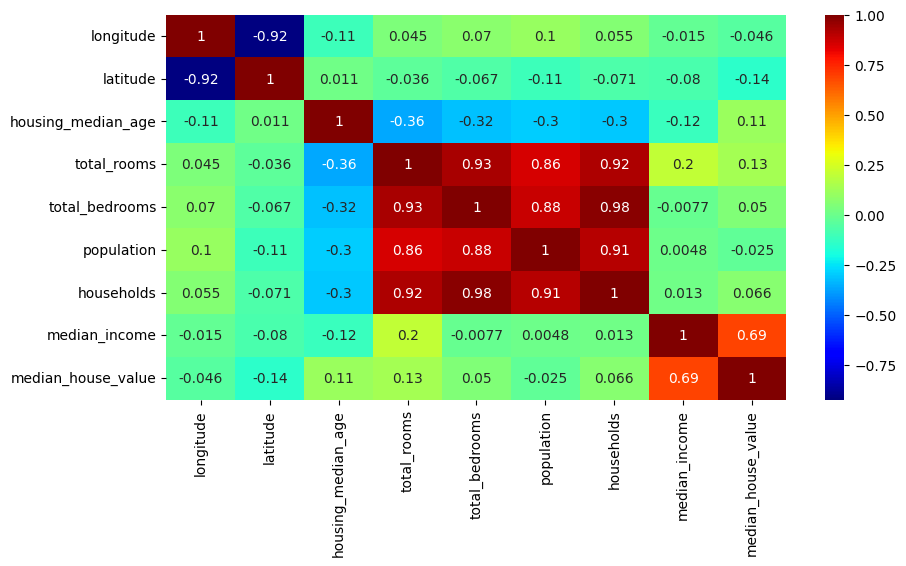

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(housing_data2.drop(columns="ocean_proximity").corr(),annot=True,cmap="jet")

<Axes: xlabel='housing_median_age', ylabel='Count'>

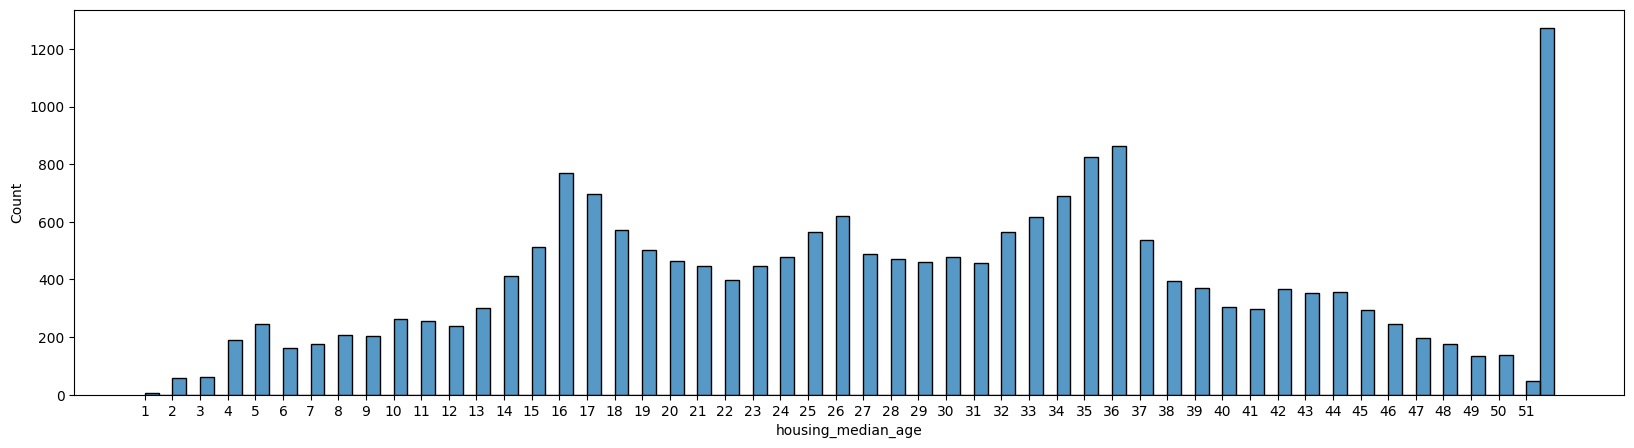

In [88]:
plt.figure(figsize=(20,5))
plt.xticks(range(1,52))
sns.histplot(x=housing_data["housing_median_age"],binwidth=0.5)

<Axes: xlabel='total_rooms'>

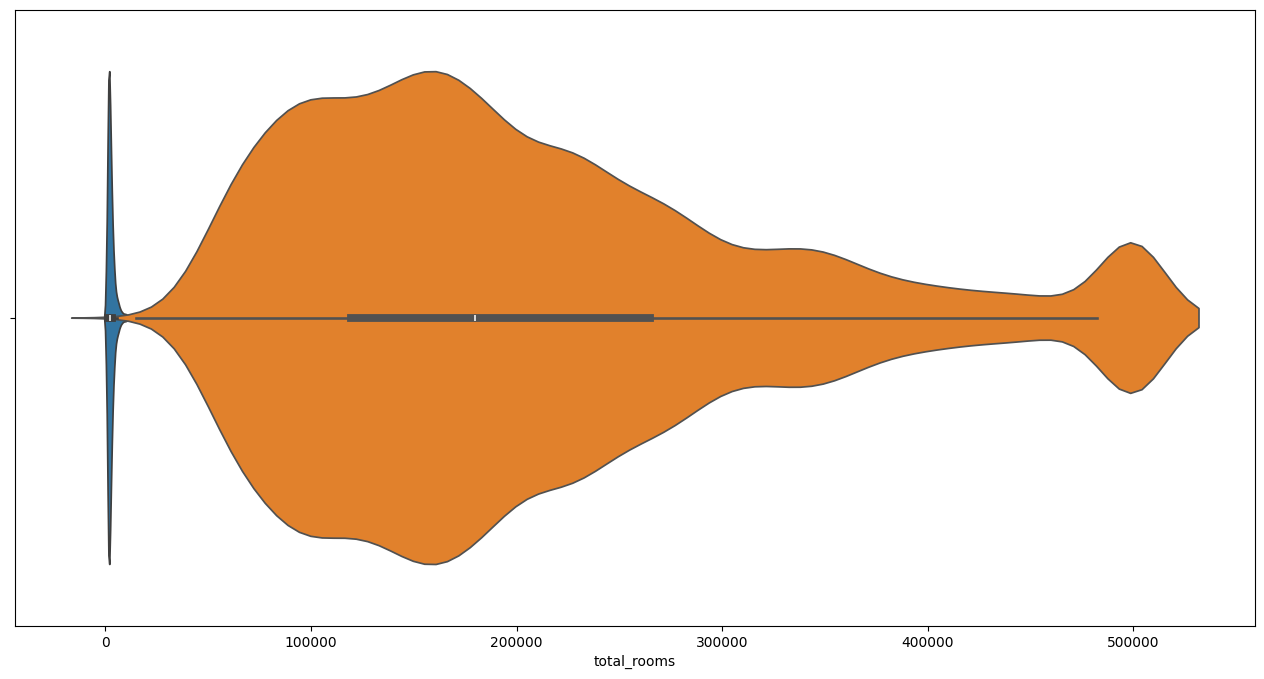

In [130]:
plt.figure(figsize=(16,8))
sns.violinplot(x=housing_data["total_rooms"])


array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

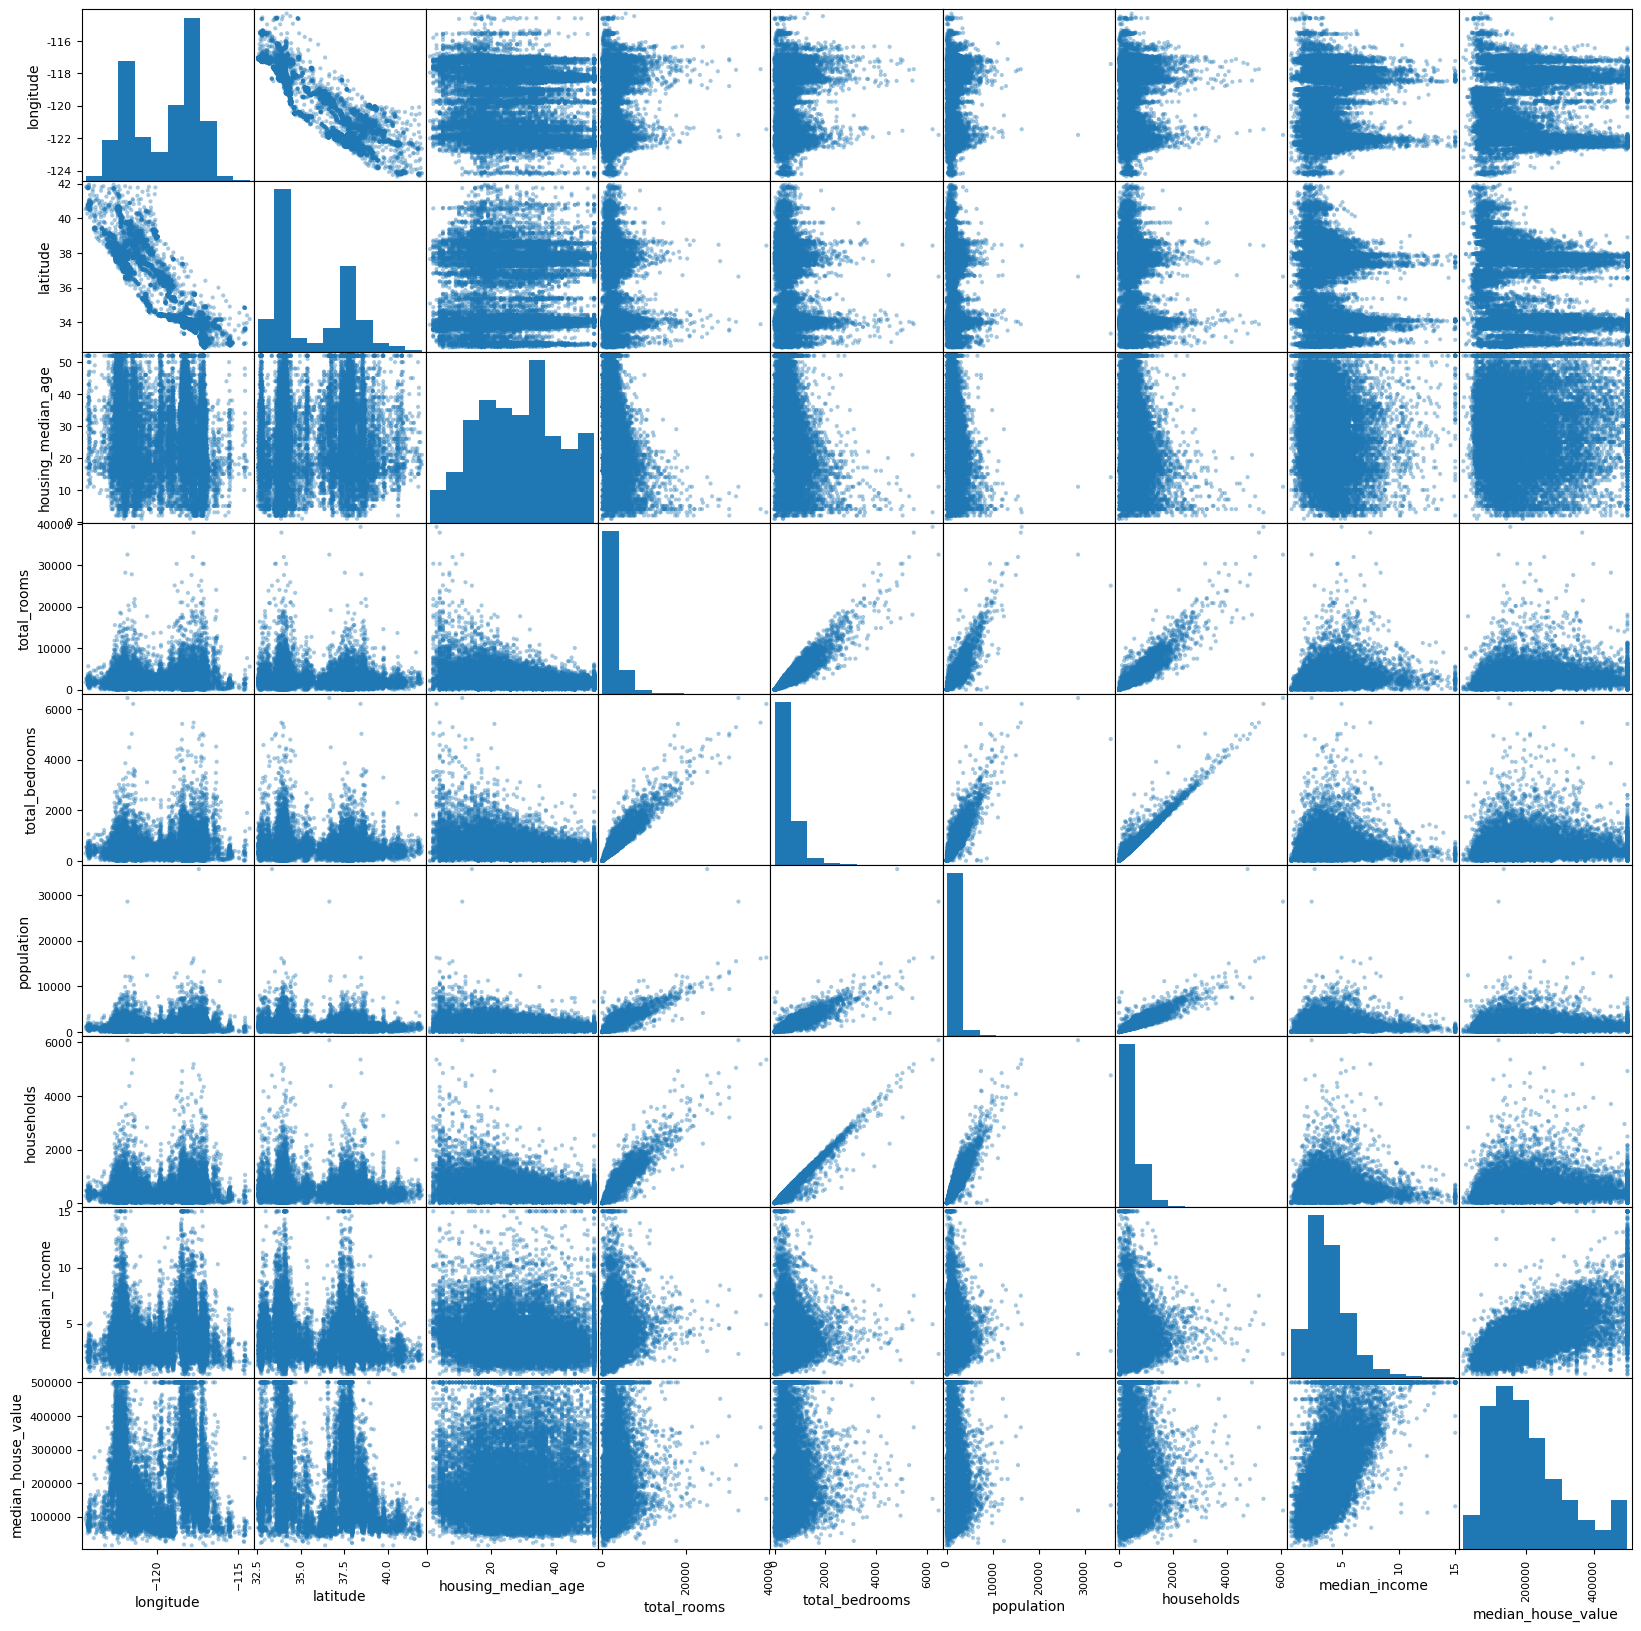

In [107]:
from pandas.plotting import scatter_matrix
scatter_matrix(figsize=(20,20),frame=housing_data.drop(columns="ocean_proximity"),alpha=0.4)

In [122]:
plt.plot(housing_data["population"],range(len(housing_data["population"])))

(0.4999, 82500.0)
(0.4999, 90600.0)
(0.4999, 500001.0)
(0.4999, 67500.0)
(0.4999, 162500.0)
(0.4999, 112500.0)
(0.4999, 162500.0)
(0.4999, 56700.0)
(0.4999, 73500.0)
(0.4999, 55000.0)
(0.4999, 100000.0)
(0.4999, 500001.0)
(0.536, 350000.0)
(0.536, 162500.0)
(0.536, 87500.0)
(0.536, 42500.0)
(0.536, 112500.0)
(0.536, 87500.0)
(0.536, 375000.0)
(0.536, 14999.0)
(0.536, 275000.0)
(0.536, 162500.0)
(0.5495, 91700.0)
(0.6433, 111300.0)
(0.6775, 350000.0)
(0.6825, 187500.0)
(0.6831, 87500.0)
(0.696, 42500.0)
(0.6991, 89500.0)
(0.7007, 134400.0)
(0.7025, 500001.0)
(0.7054, 137500.0)
(0.7068, 200000.0)
(0.7069, 70300.0)
(0.7075, 78800.0)
(0.716, 104200.0)
(0.7235, 71300.0)
(0.7286, 95200.0)
(0.7403, 68600.0)
(0.7445, 112500.0)
(0.7473, 168800.0)
(0.75, 162500.0)
(0.7526, 162500.0)
(0.7591, 350000.0)
(0.76, 162500.0)
(0.7683, 81800.0)
(0.7684, 153100.0)
(0.7685, 187500.0)
(0.7714, 87500.0)
(0.78, 55500.0)
(0.7917, 22500.0)
(0.799, 51800.0)
(0.8012, 81800.0)
(0.8024, 58300.0)
(0.8026, 112500.0)


In [117]:
housing_data["households"].sort_values().index

Index([ 8799, 12885, 18173, 14145,  9695,  1006,  3617, 18344,  5184,  1235,
       ...
       13949, 13523,  8827, 12594,  8620, 14861, 18514, 11617,  5215,  9795],
      dtype='int64', length=20640)

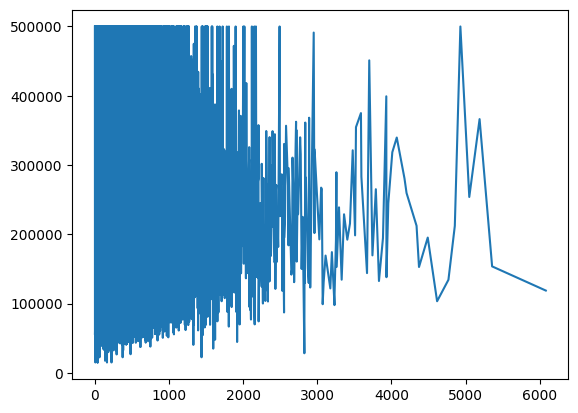

In [119]:
plt.plot(housing_data["households"].sort_values(),housing_data["median_house_value"][housing_data["households"].sort_values().index])